In [133]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 从pyhton列表创建数组
可以用`np.array`从python列表创建数组:  
>请记住,不同于Python列表,Numpy要求数组必须包含同一类型的数据.如果类型不匹配,Numpy将会向上转换

In [15]:
np.array([1, 4, 2, 5, 3])


array([1, 4, 2, 5, 3])

In [17]:
np.array([3.14, 4, 2, 3]).dtype#数据类型全部为float64

dtype('float64')

In [22]:
np.array([1, 2, 3, 4], dtype='float32')#使用dtype指定具体的数据类型

array([1., 2., 3., 4.], dtype=float32)

In [24]:
np.array([range(i, i+3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### 从头开始创建数组


In [19]:
np.linspace(0, 1 ,5)#创建一个5个元素的数组,这五个数均匀的分配到0~1中

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [21]:
np.random.random((3, 3))#创建一个3x3的,均值0,方差1的正太分布数组

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276]])

## 数组切片
`x[start:stop:step]`start启示,stop结尾,step步长
`x[start::interval]`
if interval>0
    表示正向间隔步长
    interval <

In [14]:
np.random.seed(0)

In [4]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
x[:5]

array([0, 1, 2, 3, 4])

In [7]:
x[5:]#包含5

array([5, 6, 7, 8, 9])

In [9]:
x[::2]#步长为2

array([0, 2, 4, 6, 8])

In [11]:
x[1::2]#索引从1开始,每隔一个元素

array([1, 3, 5, 7, 9])

In [12]:
x[::-1]#所有元素,逆序的


array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [13]:
x[-2::-2]#索引从-2开始,每隔一个元素逆序

array([8, 6, 4, 2, 0])

### 多维子数组
多维切片也才采用相同的方式处理,用冒号分隔

In [ ]:
x2 = np.random.


### 数组拼接和分裂
拼接或链接Numpy中两个数组主要由`np.concatenate, np.vstack, np.hstack`, vstack和hstack与concatenate是一个系列,不会开辟新的维度,没有要求same shape  !!  
`np.stack([array], axis)`沿着一个新的维度合并数组,要求所有array必须有相同的shape!! why?
[[1,2,3], [2,3]]这样无法构成矩阵,因此要求sequence序列必须有相同的维度!  
合并之后会生成一个新的维度,这点与concatenate不同

In [64]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
# np.concatenate([x, y])
np.stack([x, y], axis=-1)#axis为指定新生成的维度

array([[1, 3],
       [2, 2],
       [3, 1]])

In [29]:
x = np.array([1, 2, 3])
y = np.array([2, 3, 4])
np.stack([x, y])

array([[1, 2, 3],
       [2, 3, 4]])

In [37]:
x = np.array([1, 2, 3])
grid = np.array([[9,8,7],
                 [6,5,4]])
# np.vstack([x, grid]).shape
np.concatenate([x, grid], axis=-1)

ValueError: all the input arrays must have same number of dimensions

In [41]:
np.array([1, 2])[:, np.newaxis]#创建一个新的轴,可以理解为

array([[1],
       [2]])

>newaxis理解方法:  
**e.g.:**  
a = [1, 2, 3]  原本的shape为(3, )
[:]意味着取当前所有元素,[:, newaxis]对每个元素向下延伸维度,即(3, 1)  
[newaxis, :]取当前所有元素,向外延伸维度(1, 3)  
:所在轴为之前的所有元素, newaxis维度为1, 可以如此机械记忆


In [71]:
x = np.array([1, 2])[:, np.newaxis]
grid = np.array([[1,2,3], 
                 [1,2,3]])
# np.vstack([x, grid])
np.vstack([x, grid])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

沿着固定维度处理数组时,使用`np.vstack()`和`np.hstack()`函数会更加简洁

In [27]:
y = np.array([[99], 
             [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

In [60]:
x = np.zeros((3, 2))
y = np.ones((3, 2))
np.stack([x, y], axis=1)
# np.vstack([x, y])

array([[[0., 0.],
        [1., 1.]],

       [[0., 0.],
        [1., 1.]],

       [[0., 0.],
        [1., 1.]]])

## 聚合函数
聚合:

In [72]:
L = np.random.random(100)
np.sum(L)

46.36265566180166

In [ ]:
np.any#验证任何一个元素是否为真

## 数组计算:广播
广播允许二进制操作可以用于不同大小的数组.例如,可以简单地将一个标量(可以认为一个零维的数组)和一个数组相加

In [73]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [74]:
a + 5#可以和标量相加

array([5, 6, 7])

In [78]:
M = np.ones([3, 3, 3])
M + a

array([[[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]])

这个可以将这个原理扩展到更高维度的数组, 下面例子是数据归一化.

In [92]:
x = np.random.random((10, 3))
Xmean = x.mean(0)#在哪个维度上使用,return的相应维度就被抹平了
X_centered = x -Xmean
X_centered.mean()#为了进一步核对我们的处理是否正确,可以查看归一化的数组均值是否接近为0

-4.4408920985006264e-17

### 比较,掩码和布尔逻辑
当你想基于某些规则来抽取,修改,技术或对一个数组中的值进行其他操作时,
掩码就派上用场了.例如你希望统计数组中有多少值大于阈值,或者删除所有超过某些门限值的异常点.
在numpy中,布尔掩码通常是完成这类任务的最高效方式

In [135]:
import numpy as np
import pandas as pd
# rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
# inches = rainfall / 254
# inches.shape

In [96]:
x = np.array([1, 2, 3, 4, 5])
x < 3

array([ True,  True, False, False, False])

In [97]:
x > 3

array([False, False, False,  True,  True])

In [99]:
x == 3

array([False, False,  True, False, False])

In [100]:
x != 3

array([ True,  True, False,  True,  True])

和算术运算符一样,比较运算操作在numpy中也是借助通用函数实现的.  
### 操作布尔数组
给定一个布尔数组,可以实现很多有用的操作
>False会被解释为0, True被解释为1

In [104]:
x = np.random.randint(-3, 3, size=9).reshape((3,3))
x

array([[ 2,  0, -2],
       [-3, -3, -3],
       [-3, -1,  1]])

In [107]:
np.count_nonzero(x < 0)#统计x中小于0元素的个数

6

如果需要快速检车这些值是否为true,可以用`np.any()`或者`np.all()`


In [109]:
np.any(x > 0, axis=0)#对axis=0的每一个维度进行判断,如果存在>0的元素即为True

array([ True, False,  True])

In [111]:
np.all(x < 0, axis=0)#是否所有值都小于10

array([False, False, False])

## 布尔数组作为掩码
以前面小节用过的x数组为例,假设我们希望抽取数组中所有小于5的元素

In [114]:
x < 5

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [116]:
x[x < 5]#直接将掩码放到索引的方括号中,返回的数组就是所有满足条件的值

array([ 2,  0, -2, -3, -3, -3, -3, -1,  1])

### 花哨索引
意味着传递一个索引数组一次性来获取多个数组元素  
r

In [120]:
rand = np.random.randint(0, 10, size=10)
ind = [3, 4, 5]
rand[ind]

array([4, 5, 8])

组合索引  
花哨的索引可以和其他方案结合起来形成更强大的索引操作

In [124]:
x = np.arange(12).reshape((3, 4))
x[2, [2, 0, 1]]#组合使用切片索引和花哨索引

array([10,  8,  9])

### 用花哨的索引修改值  
花哨的索引可以被用于获取部分数组,也可以被用于修改部分数组.例如,我们有一个索引数组,并且希望设置数组中对应的值:


In [125]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)


[ 0 99 99  3 99  5  6  7 99  9]


不过要注意,操作中重复的索引会导致一些出乎意料的结果产生

In [127]:
x = np.zeros(10)
x[[0, 0]] = 4, 6
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


这个操作首先赋值x[0]=4,然后赋值x[0]=6,因此当然x[0]的值为6

In [128]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

### 数据区间划分

In [ ]:
np.linspace(0, 1, )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[13 11 12 14 14  8 12 10 10 11 10 13 11 10 11 11 13 10 11  8  5 11 12  9
 14  7 10 10 13 13 10 11  8  6  9 10 12 12  9  9  8  7  7 14  9  9  8 11
  7 10  8 11  9  8 10 11 10 11  9  9  9  9  8  7 10  9  7 11  8 10 11 10
 12  8 11  9  8  9  9 10  8 12 11  7 13 14 12 10  8 12  9 12 10 12 11 11
 10 13 10 11]


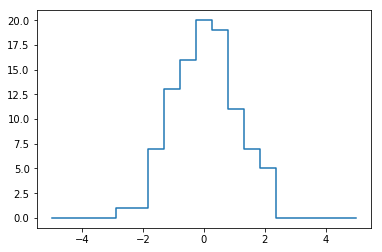

In [140]:
np.random.seed(0)
x = np.random.randn(100)
#手动计算直方图
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
print(counts)
#为每个x找到合适的区间
i = np.searchsorted(bins, x)
print(i)
np.add.at(counts, i, 1)
plt.plot(bins, counts, linestyle='steps')